# Identificación de estructuras en tejidos vegetales

In [1]:
import cv2
import numpy as np

from plantcv import plantcv as pcv



In [2]:
# Input image into self.image (include file path if image is not in 
# the same folder as jupyter notebook)

# Set self.debug to "plot" so that image outputs for each step is shown
# once cell is run in jupyter notebooks (recommended)

class options:
    def __init__(self):        
        self.image = "./tejido1.jpg"
        self.debug = "plot"
        self.writeimg = False
        self.result = "seed_analysis_results"
        self.outdir = "."

In [3]:
# Get options
args = options()

# Set debug to the global parameter
pcv.params.debug = args.debug



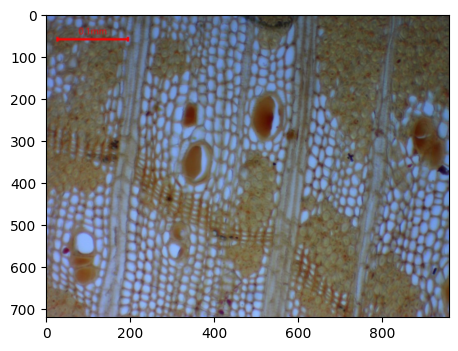

In [4]:
# Inputs:
#   filename = Image file to be read in 
#   mode     = How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)

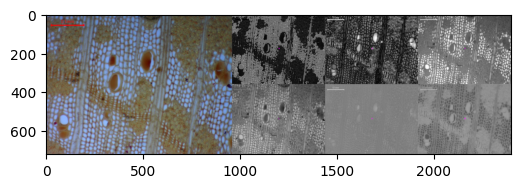

In [5]:
# Inputs:
#   rbg_img      = original image
#   original_img = whether to include the original RGB images in the display: True (default) or False
colorspace_img = pcv.visualize.colorspaces(rgb_img=img)

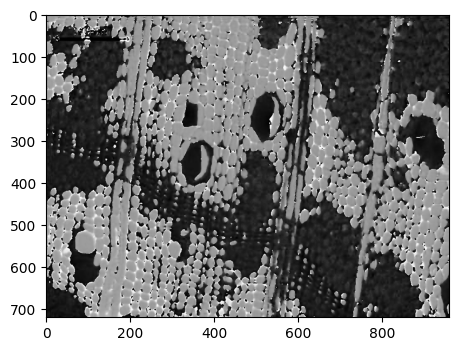

In [7]:
# Inputs:
#   rbg_img - original image
#   channel - desired colorspace 
h_img = pcv.rgb2gray_hsv(rgb_img=img, channel='h')

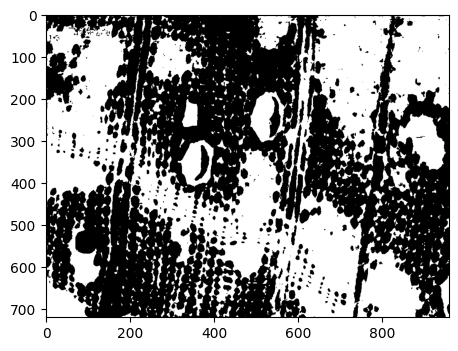

In [62]:
h_thresh=pcv.threshold.binary(gray_img=h_img, threshold=40, max_value=150, object_type='dark')

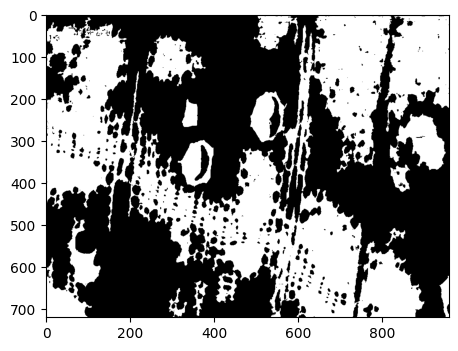

In [64]:
h_fill=pcv.fill(h_thresh,500)

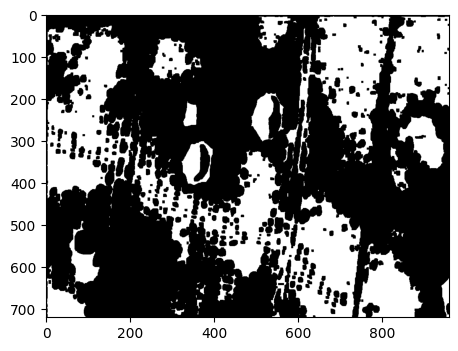

In [66]:
h_erode=pcv.erode(h_fill,ksize=3,i=2)

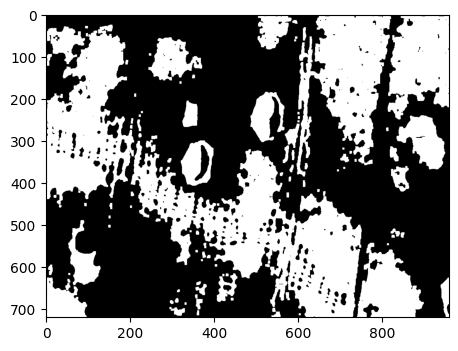

In [68]:
h_dilate=pcv.dilate(h_erode,ksize=3, i=2)

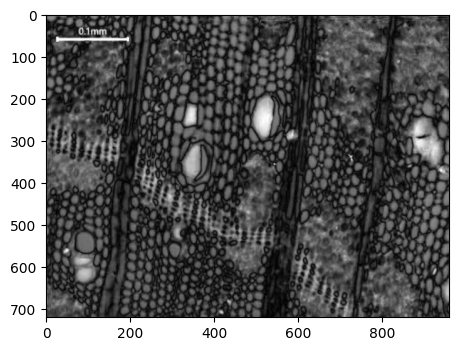

In [39]:
s_img = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

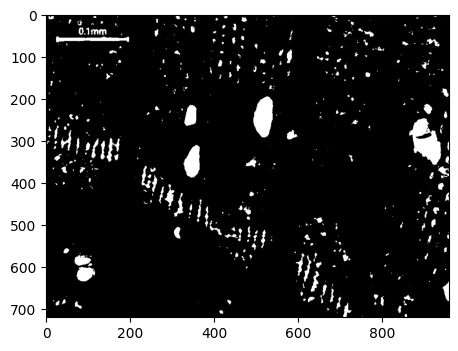

In [45]:
b_thresh=pcv.threshold.binary(gray_img=s_img, threshold=125, max_value=150, object_type='light')

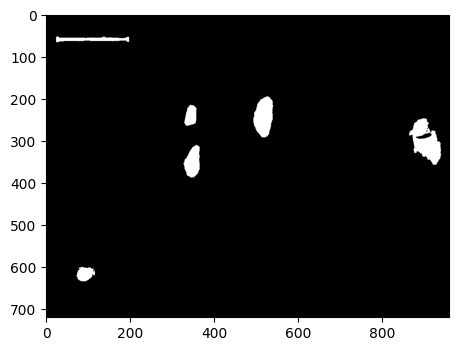

In [47]:
b_fill=pcv.fill(b_thresh,800)

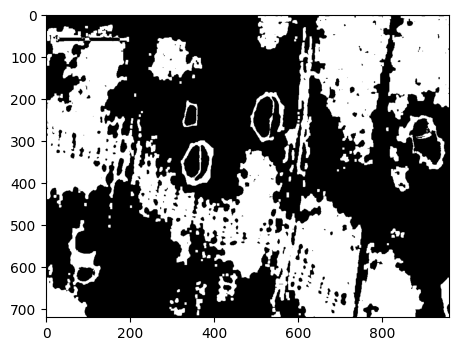

In [71]:
hb_conditional=pcv.logical_xor(h_dilate,b_fill)

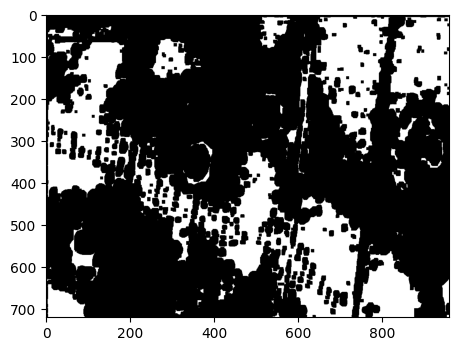

In [80]:
hb_erode=pcv.erode(hb_conditional,ksize=3,i=3)

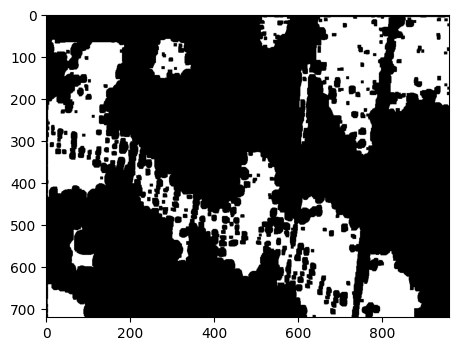

In [83]:
hb_fill=pcv.fill(hb_erode,800)

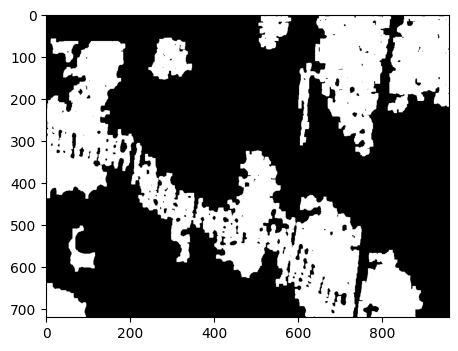

In [84]:
hb_dilate=pcv.dilate(hb_fill,ksize=3,i=3)

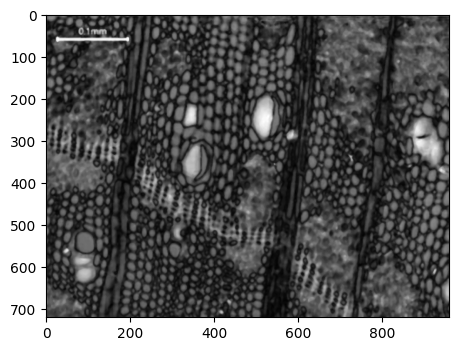

In [86]:
s_median=pcv.median_blur(s_img,5)

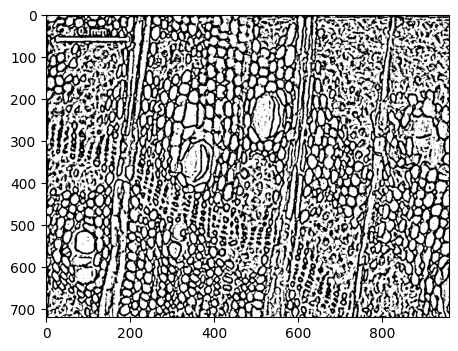

In [111]:
g_img=pcv.threshold.gaussian(s_median, 5, object_type="light")